# Step 1: Data Preparation

1. Import Libraries:

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2. Load Dataset:

Data Source Link: https://www.nseindia.com/reports-indices-historical-index-data

In [97]:
data_0 = pd.read_csv('/content/NIFTY 50 2020.csv')
data_1 = pd.read_csv('/content/NIFTY 50 2021.csv')
data_2 = pd.read_csv('/content/NIFTY 50 2022.csv')
data_3 = pd.read_csv('/content/NIFTY 50 2023.csv')
data_4 = pd.read_csv('/content/NIFTY 50 2024.csv')


In [98]:
data = pd.concat([data_0, data_1, data_2, data_3, data_4], axis=0)
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-OCT-2019,11890.45,11945.00,11855.10,11877.45,1.414837e+09,31304.73
1,01-NOV-2019,11886.60,11918.30,11843.35,11890.60,8.553385e+08,24933.55
2,04-NOV-2019,11928.90,11989.15,11905.35,11941.30,8.230505e+08,23203.88
3,05-NOV-2019,11974.60,11978.95,11861.90,11917.20,6.319521e+08,20995.88
4,06-NOV-2019,11911.50,12002.90,11850.25,11966.05,6.033513e+08,23324.97


In [99]:
data.shape

(1247, 7)

In [100]:
count = 0

for i in [data_0, data_1, data_2, data_3, data_4]:
  x = i.shape[0]
  count += x

print(count)

1247


In [101]:
data_0

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-OCT-2019,11890.45,11945.00,11855.10,11877.45,1414837250,31304.73
1,01-NOV-2019,11886.60,11918.30,11843.35,11890.60,855338495,24933.55
2,04-NOV-2019,11928.90,11989.15,11905.35,11941.30,823050457,23203.88
3,05-NOV-2019,11974.60,11978.95,11861.90,11917.20,631952071,20995.88
4,06-NOV-2019,11911.50,12002.90,11850.25,11966.05,603351290,23324.97
...,...,...,...,...,...,...,...
247,26-OCT-2020,11937.40,11942.85,11711.70,11767.75,519815905,29316.02
248,27-OCT-2020,11807.10,11899.05,11723.00,11889.40,616318543,37989.97
249,28-OCT-2020,11922.60,11929.40,11684.85,11729.60,704018608,37025.89
250,29-OCT-2020,11633.30,11744.15,11606.45,11670.80,554959844,30436.62


In [102]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             252 non-null    object 
 1   Open             252 non-null    float64
 2   High             252 non-null    float64
 3   Low              252 non-null    float64
 4   Close            252 non-null    float64
 5   Shares Traded    252 non-null    int64  
 6   Turnover (₹ Cr)  252 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Date Format for date column

In [103]:
data.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [104]:
# Convert 'Date' column to datetime format
data['Date '] = pd.to_datetime(data['Date '], format='%d-%b-%Y')

# Convert to the desired format (e.g., 'YYYY-MM-DD')
data['Date '] = data['Date '].dt.strftime('%Y-%m-%d')

In [105]:
data['Date '].head()

,Date
0,2019-10-31
1,2019-11-01
2,2019-11-04
3,2019-11-05
4,2019-11-06


Feature Selection:
Using only the Close column for prediction.



In [106]:
close_prices = data['Close '].values.reshape(-1, 1)
close_prices

array([[11877.45],
       [11890.6 ],
       [11941.3 ],
       ...,
       [24466.85],
       [24340.85],
       [24205.35]])

Normalize Data

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(close_prices)

Create Training Dataset

In [108]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(normalized_data)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

Split Data:

In [109]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 2: Build the Neural Network

Define Model:

In [110]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [111]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model:

In [112]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the Model:

In [113]:
model.fit(X_train, y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1290
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0091
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0068
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0025
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

# Step 3: Evaluate and Predict

Evaluate on Test Data:

In [114]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Transform back to original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


Visualize Results:

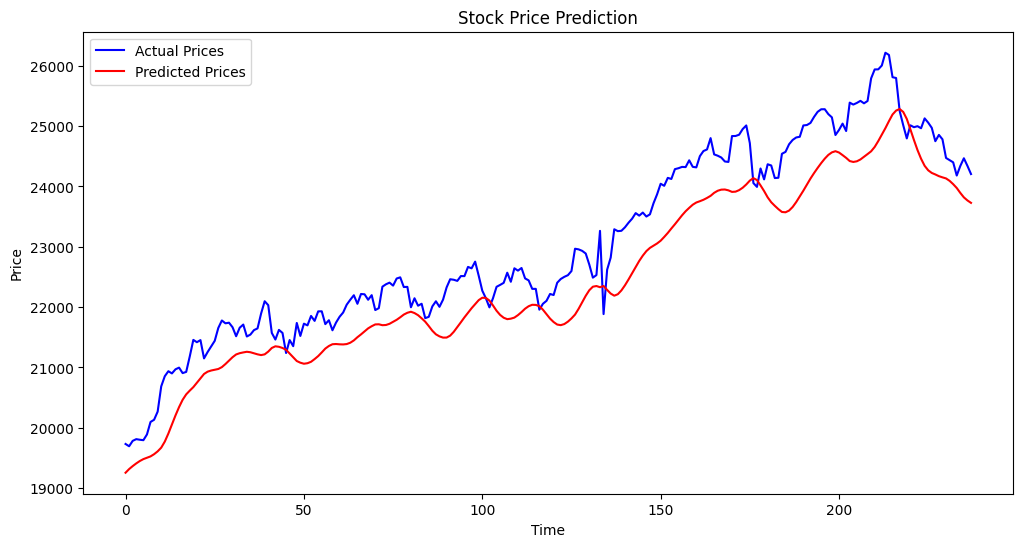

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prediction

In [116]:
# Retrieve the Last 60 Days of Data:

last_60_days = normalized_data[-60:]  # Last 60 days of normalized data


# Reshape Input for LSTM:
X_input = last_60_days.reshape(1, 60, 1)  # (samples, time steps, features)



Step 2: Make a Prediction

In [117]:
predicted_price = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_price)  # Convert back to original scale
print("Predicted Closing Price:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Closing Price: 23687.684


# Step 3: Predict Multiple Days (Optional)

Set Up a Prediction Loop

In [118]:
predictions = []
input_sequence = last_60_days  # Start with the last 60 days

for _ in range(10):  # Predict the next 10 days
    X_input = input_sequence.reshape(1, 60, 1)
    predicted_price = model.predict(X_input)[0, 0]  # Predict one step
    predictions.append(predicted_price)

    # Update the input sequence with the new prediction
    input_sequence = np.append(input_sequence, predicted_price)[1:]


predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)
print("Predicted Prices for Next 10 Days:", predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Prices for Next 10 Days: [23687.684 23608.936 23502.717 23377.83  23240.81  23096.346 22947.742
 22797.291 22646.572 22496.668]


Inverse Transform Predictions:

In [119]:
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)
print("Predicted Prices for Next 10 Days:", predictions.flatten())


Predicted Prices for Next 10 Days: [4.4073590e+08 4.3927072e+08 4.3729443e+08 4.3497082e+08 4.3242147e+08
 4.2973357e+08 4.2696870e+08 4.2416944e+08 4.2136518e+08 4.1857610e+08]


In [120]:
predictions.flatten()[0]

440735900.0

In [121]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1112 - val_loss: 533256800.0000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - val_loss: 533249952.0000
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 533246976.0000
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 533245376.0000
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 533244160.0000
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7540e-04 - val_loss: 533244640.0000
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8894e-04 - val_loss: 533244416.0000
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.1271e-04 - val_loss: 533244736.0000
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2048e-04 - val_loss: 533244416.0000
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.2620e-04 - val_loss: 533245152.0000
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━

In [124]:
predictions = []
input_sequence = last_60_days  # Start with the last 60 days

for _ in range(10):  # Predict the next 10 days
    X_input = input_sequence.reshape(1, 60, 1)
    predicted_price = model.predict(X_input)[0, 0]  # Predict one step
    predictions.append(predicted_price)

    # Update the input sequence with the new prediction
    input_sequence = np.append(input_sequence, predicted_price)[1:]


predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)
print("Predicted Prices for Next 10 Days:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Prices for Next 10 Days: [24045.299 24002.984 23925.092 23829.633 23728.102 23626.535 23527.848
 23433.469 23344.154 23260.297]
